# EDA y ETL

In [95]:
# Importo las librerias que usaré
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

In [92]:
# Cargo ruta de la data
homicidios_excel = 'datasets\homicidios.xlsx'

# Cargo el archivo de Excel en un DataFrame de Pandas
df_homicidios = pd.read_excel(homicidios_excel)

# Guardo el DataFrame como un archivo CSV
homicidios_csv = 'datasets/homicidios.csv'
df_homicidios.to_csv(homicidios_csv, index=False)

In [93]:
# Visualizo el df_homicidios para saber que debo transformar y/o limpiar
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [79]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Voy a cambiar todas las columnas que contengan valores de tipo 'str' a letras mayúsculas. Además, eliminaré duplicados, si existen, y eliminaré las filas que contengan valores nulos en todas las columnas. Cambiaré el tipo de dato de columnas específicas y reemplazaré los valores nulos en todas las columnas por 'SD'.

---

Cambiar todas las columnas que contengan valores de tipo 'str' a letras mayúsculas

In [80]:
# Convertir todas las columnas a mayúsculas
df_homicidios = df_homicidios.applymap(lambda x: x.upper() if isinstance(x, str) else x)

# Convertir los nombres de las columnas a mayúsculas
df_homicidios.columns = df_homicidios.columns.str.upper()

In [81]:
df_homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'CALLE', 'ALTURA', 'CRUCE',
       'DIRECCIÓN NORMALIZADA', 'COMUNA', 'XY (CABA)', 'POS X', 'POS Y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

---

Observo si hay valores duplicados, de ser así los elimino

In [82]:
# Identifico filas duplicadas basadas en todas las columnas
duplicados_columns = df_homicidios[df_homicidios.duplicated(subset=['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'CALLE', 'ALTURA', 'CRUCE',
       'DIRECCIÓN NORMALIZADA', 'COMUNA', 'XY (CABA)', 'POS X', 'POS Y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'])]

# Mostrar las filas duplicadas
print(duplicados_columns)

Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, CALLE, ALTURA, CRUCE, DIRECCIÓN NORMALIZADA, COMUNA, XY (CABA), POS X, POS Y, PARTICIPANTES, VICTIMA, ACUSADO]
Index: []

[0 rows x 21 columns]


No hay duplicados

---

Observo si hay valores nulos, de ser así los elimino

In [83]:
# Verifico si hay valores nulos en todo el DataFrame
valores_nulos = df_homicidios.isnull().any()

# Mostrar qué columnas tienen valores nulos
print(valores_nulos)

ID                       False
N_VICTIMAS               False
FECHA                    False
AAAA                     False
MM                       False
DD                       False
HORA                     False
HH                       False
LUGAR_DEL_HECHO          False
TIPO_DE_CALLE            False
CALLE                     True
ALTURA                    True
CRUCE                     True
DIRECCIÓN NORMALIZADA     True
COMUNA                   False
XY (CABA)                False
POS X                    False
POS Y                    False
PARTICIPANTES            False
VICTIMA                  False
ACUSADO                  False
dtype: bool


Hay valores nulos, procedo a eliminarlos

In [84]:
# Elimino filas completamente nulas
df_homicidios.dropna(how='all', inplace=True)

---

Cambio el tipo de dato de columnas específicas

In [85]:
# Cambio el dtype de columnas especificas
df_homicidios['ALTURA'] = df_homicidios['ALTURA'].astype('Int64')
df_homicidios['ALTURA'] = df_homicidios['ALTURA'].astype('object')

In [86]:
# Visualizo los cambios
print(df_homicidios['ALTURA'].dtype)

object


---

Reemplazo los valores null por 'SD' (SInDato)

In [87]:
# Reemplazar los valores nulos de cada columna por 'SD'
df_homicidios = df_homicidios.fillna(value='SD')

In [88]:
# Visualizo los cambios
df_homicidios.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,ALTURA,CRUCE,DIRECCIÓN NORMALIZADA,COMUNA,XY (CABA),POS X,POS Y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,SD,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. Y FERNANDEZ DE LA CRUZ, F., G...",8,POINT (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,SD,DE LOS CORRALES AV.,"PAZ, GRAL. AV. Y DE LOS CORRALES AV.",9,POINT (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034,SD,ENTRE RIOS AV. 2034,1,POINT (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [89]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  CALLE                  696 non-null    object        
 11  ALTURA                 696 non-null    object        
 12  CRUCE                  696 non-null    object        
 13  DIREC

Guardo todos los cambios en un csv

In [94]:
ruta_guardado_csv = './datasets/homicidios.csv'

# Guardar el DataFrame en un archivo CSV
df_homicidios.to_csv(ruta_guardado_csv, index=False)

# Esto guardará el DataFrame 'df_homicidios'

---

Voy a visualizar algunas relaciones que se pueden realizar ahora con los datos ya limpios

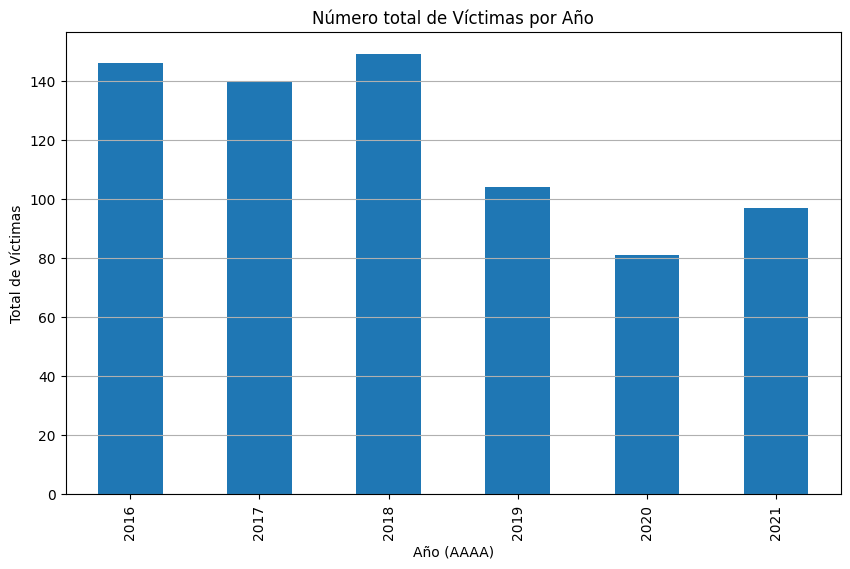

In [97]:
# Agrupar por año ('AAA') y sumar el número de víctimas para cada año
victimas_por_año = df_homicidios.groupby('AAAA')['N_VICTIMAS'].sum()

# Graficar el número de víctimas por año
victimas_por_año.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Año (AAAA)')
plt.ylabel('Total de Víctimas')
plt.title('Número total de Víctimas por Año')
plt.grid(axis='y')
plt.show()

El gráfico de barras revela que el recuento total de víctimas mostró poca variación entre 2016 y 2018, pero a partir de 2019 hasta 2020, hubo una disminución constante y significativa en el número de víctimas.

Se observa una marcada tendencia descendente, especialmente en 2020. Una explicación hipotética de esta marcada disminución en 2020 podría estar relacionada con la pandemia. El contexto de confinamiento forzado y restricciones de movilidad pudo haber contribuido a esta reducción en la cantidad de víctimas registradas.

Este descenso notable podría ser atribuido a las medidas implementadas para contener la propagación del virus, limitando así la movilidad y actividad fuera de los hogares.
Esta explicación se basa en la observación de una tendencia decreciente en los incidentes reportados y en la correlación temporal con el período de la pandemia.

In [ ]:
# Convertir los índices de años a listas
años_auto = list(victimas[auto].index)
años_moto = list(victimas_moto.index)

# Graficar el número de víctimas de automóviles y motocicletas por año (gráfico apilado)
plt.figure(figsize=(10, 6))
plt.bar(años_auto, victimas_auto.values, label='Víctimas de Automóviles')
plt.bar(años_moto, victimas_moto.values, bottom=victimas_auto.values, label='Víctimas de Motocicletas')
plt.xlabel('Año (AAAA)')
plt.ylabel('Total de Víctimas')
plt.title('Comparación de Víctimas de Automóviles y Motocicletas por Año')
plt.legend()
plt.grid(axis='y')
plt.show()


In [102]:
import matplotlib.pyplot as plt

# Sumar el número de víctimas de automóviles y motocicletas por año
victimas_auto = df_homicidios.groupby('AAAA')['VICTIMA[AUTO]'].sum()
victimas_moto = df_homicidios.groupby('AAAA')['VICTIMA[MOTO]'].sum()

# Graficar el número de víctimas de automóviles y motocicletas por año (gráfico apilado)
plt.figure(figsize=(10, 6))
plt.bar(victimas_auto.index, victimas_auto.values, label='Víctimas de Automóviles')
plt.bar(victimas_moto.index, victimas_moto.values, bottom=victimas_auto.values, label='Víctimas de Motocicletas')
plt.xlabel('Año (AAAA)')
plt.ylabel('Total de Víctimas')
plt.title('Comparación de Víctimas de Automóviles y Motocicletas por Año')
plt.legend()
plt.grid(axis='y')
plt.show()

KeyError: 'Column not found: VICTIMA[AUTO]'